In [1]:
%autosave 60

Autosaving every 60 seconds


# Домашнее задание EDA | МТС Тета
-----
- Нужно провести EDA любого датасета на ваше усмотрение в специально подготовленном ipynb
- В этом ноутбуке будут блоки под разные типы графиков
- Нужно выбрать такой датасет, который позволит построить каждый из этих графиков корректно
- В ноутбуке так же будет дополнительное поле для графика на ваш выбор. В нем должен быть график, который не был построен ранее в ноутбуке (другой тип графика)
- Ноутбук должен отбегать в режиме run all, а так же сохранять все изображения шаблонным образом, как заложено в ноутбуке
- Для каждого графика должны быть написаны выводы
- __Вместе с ноутбуком нужно сдать сохраненные изображения (проверьте корректность их сохранения перед отправкой ДЗ)__
- изображения должны быть в формате png или jpeg. Не сохраняйте изображения в html (так делает plotly)
____
**Критерии оценки**
- Вы построили все основные графики без критических ошибок – 8 баллов
- Вы выполнили пункт 1, а так же построили дополнительный график - 10 баллов
- Доп. баллы выставляются за победу в tinder игре – подробности будут позже. Но чтобы в ней победить, ваш график должен оказаться самым красивым. 
- Доп. Баллы получат топ 10 человек итогового рейтинга. 
---
- Максимум 10 баллов (и +5 дополнительных)
- 1-4 балла: незачет
- 5-6 баллов: 3, незачет
- 7-8 баллов: 4, зачет
- 9-10 баллов: 5, зачет

## подготовка

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns

In [3]:
# подставьте ваше имя и фамилию в эту переменную как в примере, (например Максим_Шаланкин)
image_name_prefix = 'Имя_Фамилия'

# можно поменять, а можно оставить - сюда будут сохраняться изображения
path_to_save_images = 'images'

In [4]:
os.makedirs(path_to_save_images, exist_ok=True)

In [5]:
# это пример данных. Этот датасет нельзя использовать в этой домашке

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [6]:
# код ниже - пример того, как у вас быть не должно. Это плохие графики. Такая работа будет оценена на 0 баллов.

## (1) line plot

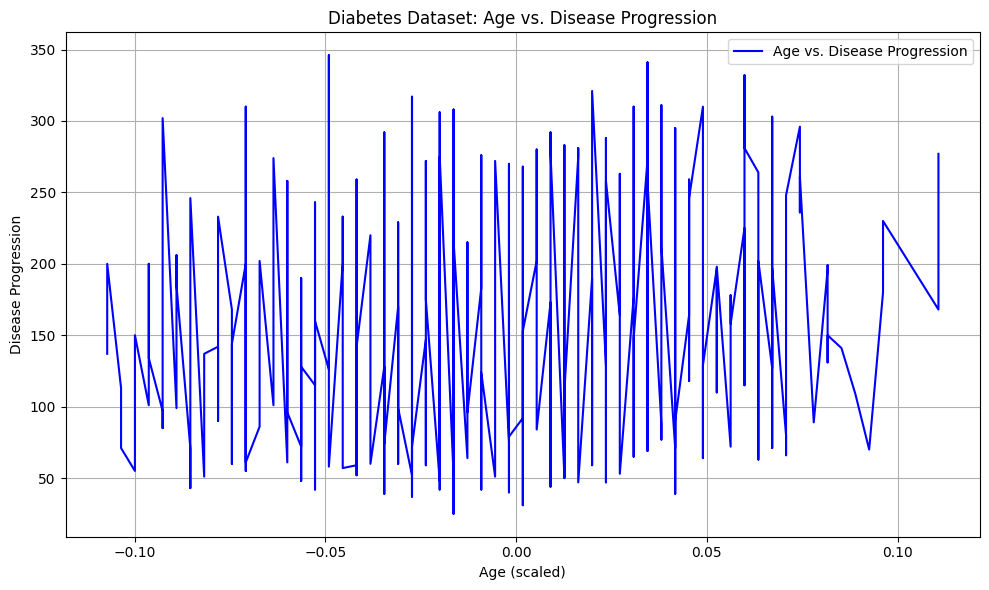

In [7]:
# это плохой пример, его нужно удалить
idxs = np.argsort((X[:, 0]))

plt.figure(figsize=(10, 6))
plt.plot(X[:, 0][idxs], y[idxs], 'b-', label='Age vs. Disease Progression')
plt.xlabel('Age (scaled)')
plt.ylabel('Disease Progression')
plt.title('Diabetes Dataset: Age vs. Disease Progression')
plt.legend()
plt.grid(True)
plt.tight_layout()

# этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_1.png')
)

In [8]:
# ваш код

#### выводы (1): написать выводы
<ваши выводы>

## (2) (bar plot или stacked bar plot)

In [9]:
# ваш код

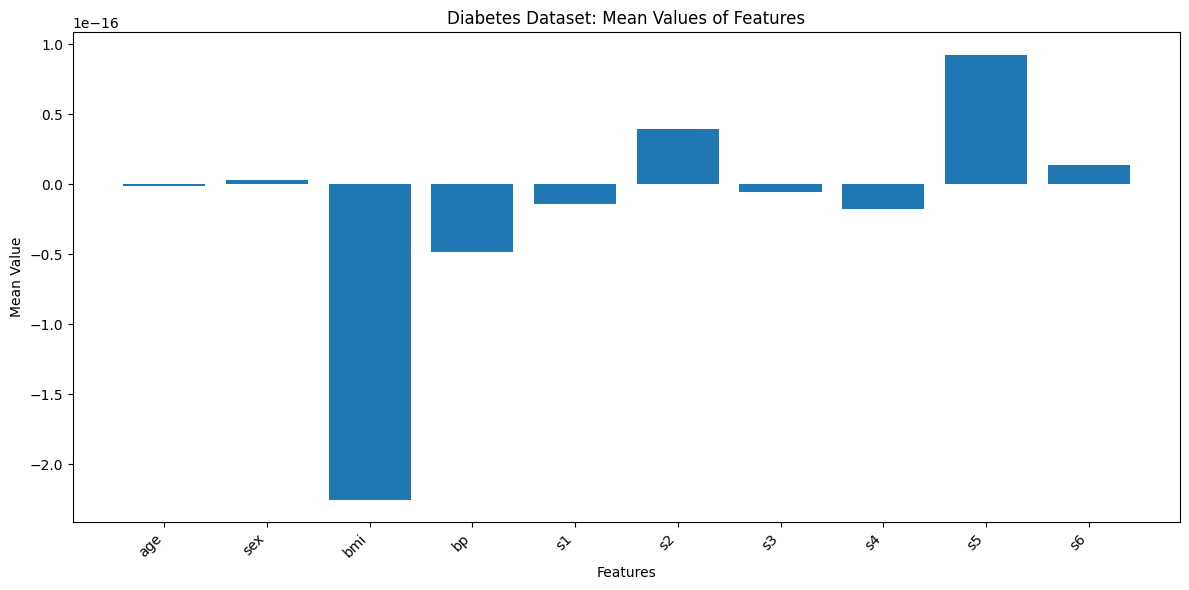

In [10]:
# это плохой пример, его нужно удалить
mean_values = np.mean(X, axis=0)

plt.figure(figsize=(12, 6))
plt.bar(feature_names, mean_values)
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Diabetes Dataset: Mean Values of Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_2.png')
)

#### выводы (2): написать выводы
<ваши выводы>

##  (3) (hist plot или pair plot или kde plot)

In [11]:
# ваш код

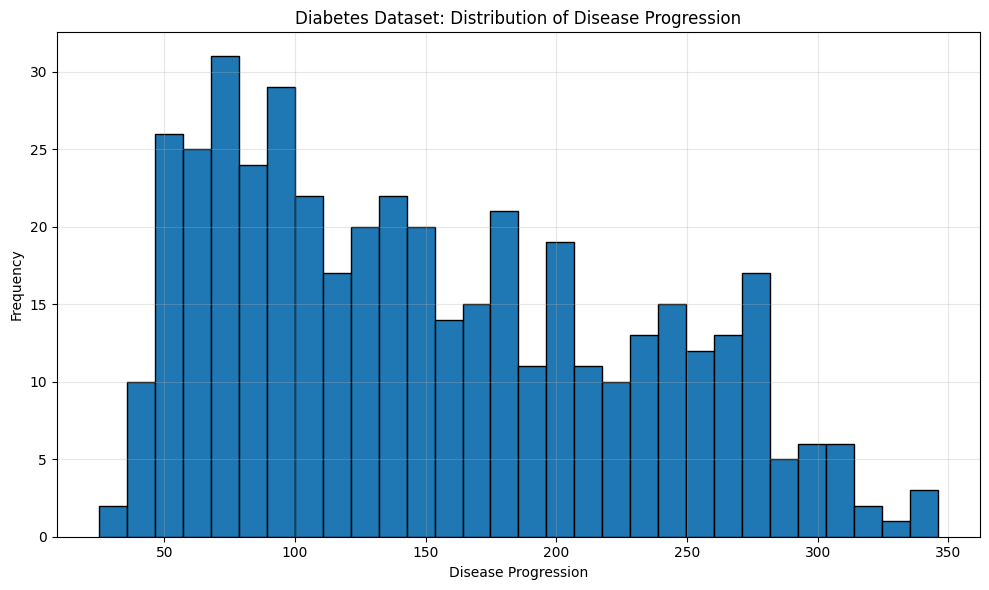

In [12]:
# это плохой пример, его нужно удалить
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.title('Diabetes Dataset: Distribution of Disease Progression')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_3.png')
)

#### выводы (3): написать выводы
<ваши выводы>

##  (4) heatmap plot

In [13]:
# ваш код

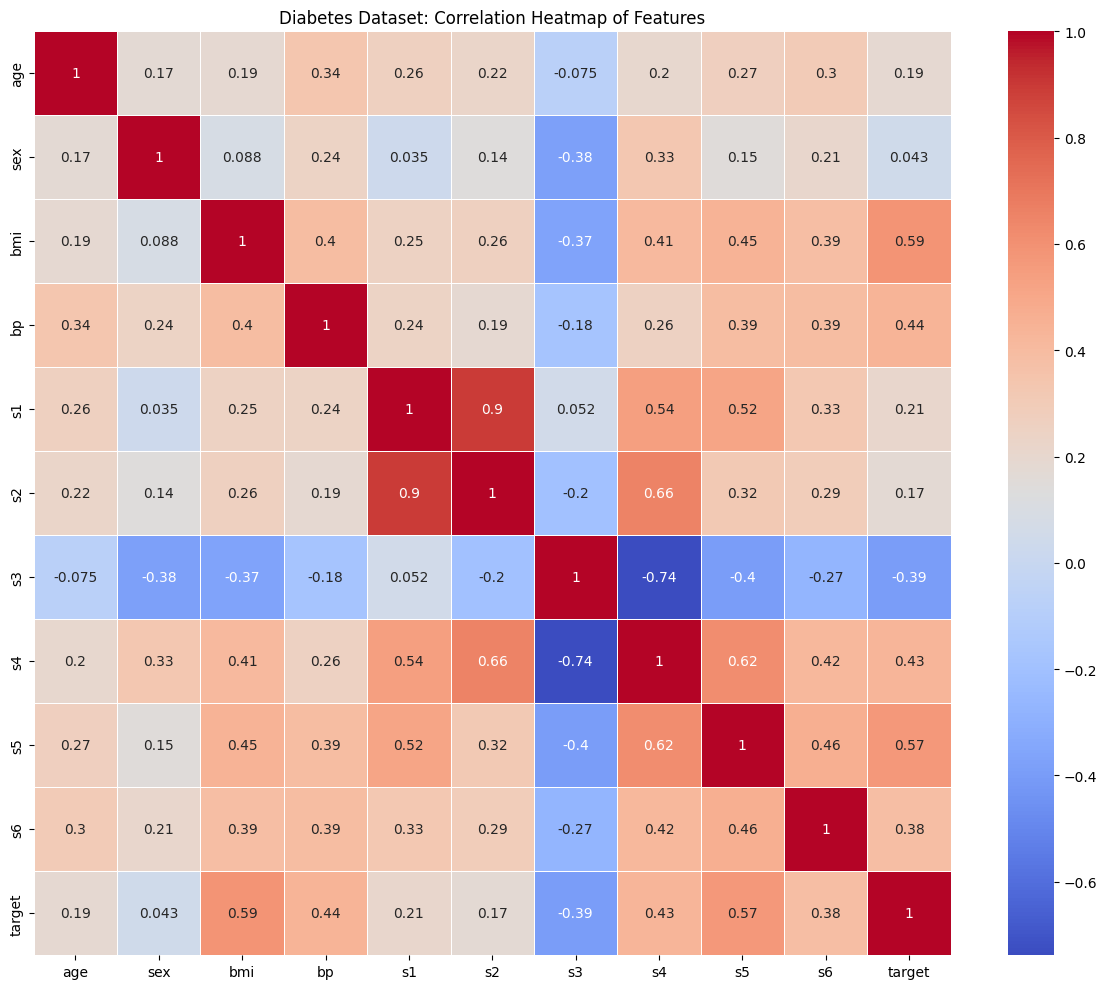

In [14]:
# это плохой пример, его нужно удалить
corr_matrix = df.corr()

# Create a heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Diabetes Dataset: Correlation Heatmap of Features')
plt.tight_layout()
plt.tight_layout()

# этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_4.png')
)

#### выводы (4): написать выводы
<ваши выводы>

##  (5) plot  на ваш выбор

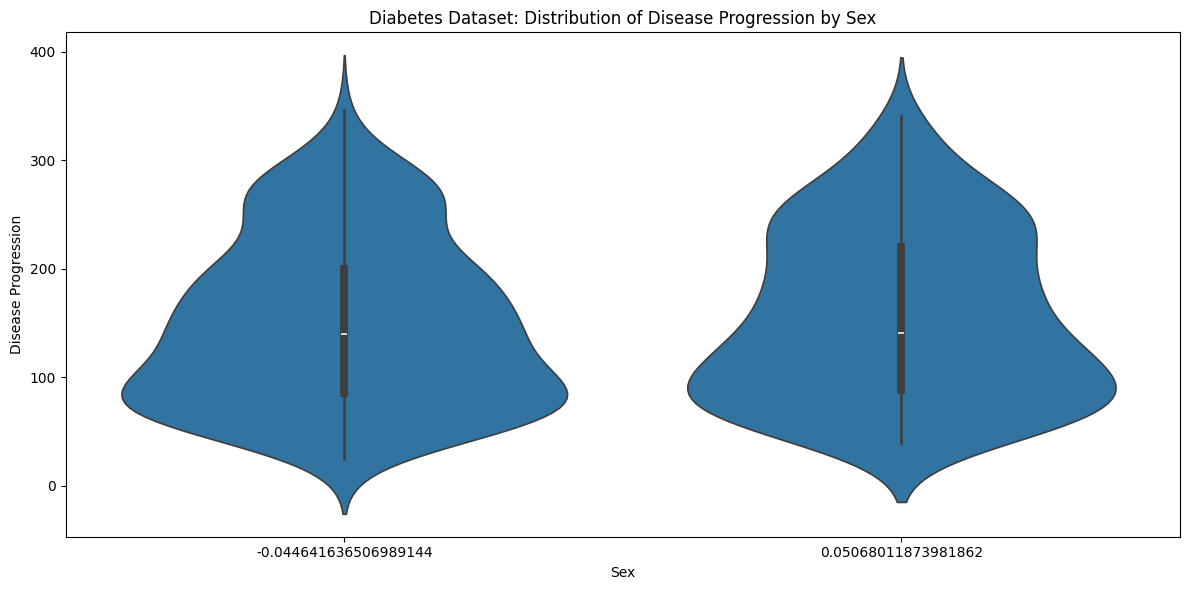

In [15]:
# это плохой пример, его нужно удалить
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='sex', y='target')
plt.xlabel('Sex')
plt.ylabel('Disease Progression')
plt.title('Diabetes Dataset: Distribution of Disease Progression by Sex')
plt.tight_layout()

# этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_5.png')
)

In [16]:
# ваш код

#### выводы (5): написать выводы
<ваши выводы>

# Итоговый вывод по всему датасету (по всему EDA)
<ваши выводы>

In [17]:
print('well done!')

well done!
